In [231]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta, n_iter, random_state):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [202]:
column = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv('iris-dataset.csv', names=column)


In [203]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [1]:
sns.FacetGrid(data, hue = 'class', size=5).map(plt.scatter, 'petal_length','petal_width').add_legend()

NameError: name 'sns' is not defined

In [206]:
data1 = data.iloc[ 50:, :]
data2 = data.iloc[ :100, :]

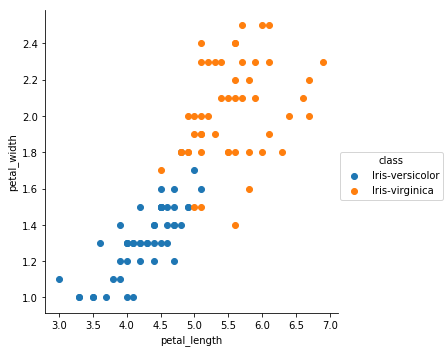

In [207]:
sns.FacetGrid(data1, hue = 'class', size=5).map(plt.scatter, 'petal_length','petal_width').add_legend()

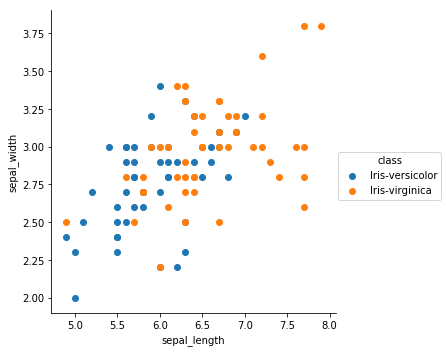

In [208]:
sns.FacetGrid(data1, hue = 'class', size=5).map(plt.scatter, 'sepal_length','sepal_width').add_legend()

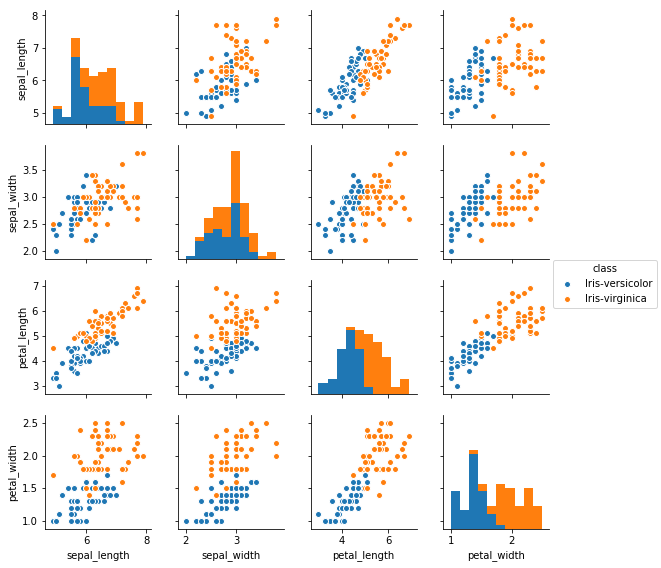

In [209]:
sns.pairplot(data1, hue='class', size=2)

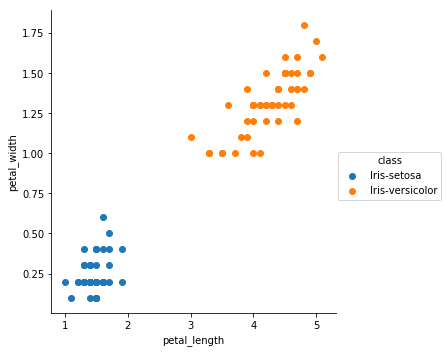

In [210]:
sns.FacetGrid(data2, hue = 'class', size=5).map(plt.scatter, 'petal_length','petal_width').add_legend()

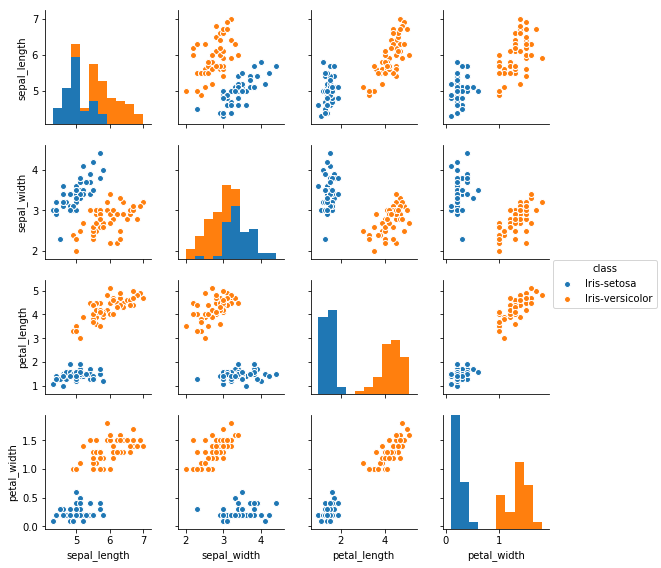

In [211]:
sns.pairplot(data2, hue='class', size=2)

In [212]:
data1['class'] = np.where(data1['class'] == 'Iris-versicolor', 1, -1)


/Users/erickkelvin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [213]:
data1.head()

,sepal_length,sepal_width,petal_length,petal_width,class
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [214]:
data1 = data1.values
np.random.seed(1)
np.random.shuffle(data1)

In [224]:
X = data1[:, :-1]
y = data1[:, -1]


In [308]:
n = 70
X_train = X[:n]
y_train = y[:n]
X_test = X[n:]
y_test = y[n:]

In [374]:
model = AdalineGD(eta= 0.001, n_iter = 100, random_state= 3 )

In [375]:
model.fit(X_train, y_train)

In [376]:
y_pred = model.predict(X_test)

In [377]:
accuracy = sum (y_test == y_pred) / y_test.shape

In [378]:
print(accuracy)

[0.56666667]


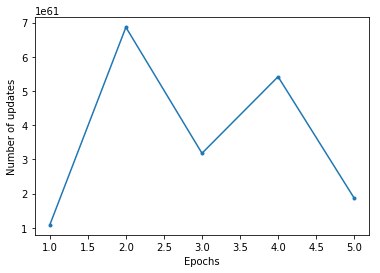

In [379]:
plt.plot(range(1, len(model.w_)+1), model.w_, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Number of updates');